📂 Please upload your CSV file...


Saving output_file.csv to output_file (1).csv
✅ Loaded file: output_file (1).csv
✅ Data range: 2024-07-18 10:30:00 → 2025-02-27 23:10:01


/tmp/ipython-input-2-975034990.py:38: FutureWarning: Parsed string "Thu Jul 18 10:30:00 IST 2024" included an un-recognized timezone "IST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
/tmp/ipython-input-2-975034990.py:45: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').mean().interpolate()
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 166, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 166, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 183)            │        11,895 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,855 (143.96 KB)

 Trainable params: 36,855 (143.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0568
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0562
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0555
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0547
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0539
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0529
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0519
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0505
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0487
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0468
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0443
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0410
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0368
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0316
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0271
Epoch 16/100
1/

/tmp/ipython-input-2-975034990.py:99: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_len, freq='1H')
/tmp/ipython-input-2-975034990.py:117: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


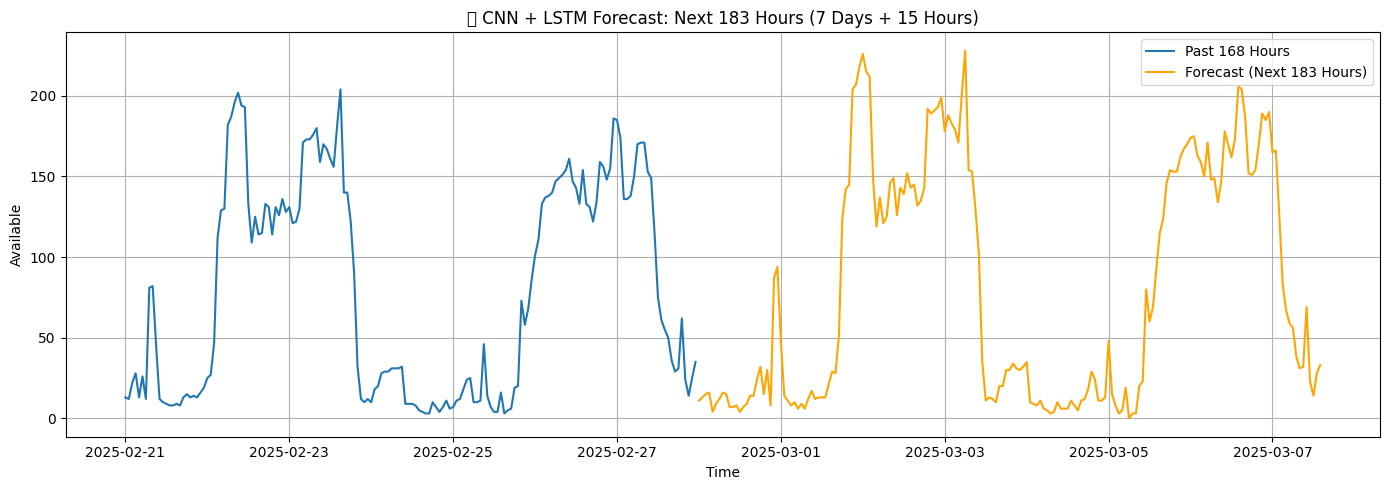

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Forecast saved to: cnn_lstm_forecast_183_hours.csv


In [2]:
# ============================================================
# ✅ Colab: CNN + LSTM Forecast (Next 183 Hours)
# ============================================================

# ------------------------------------------------------------
# 0. Install required libraries
# ------------------------------------------------------------
!pip install pandas numpy matplotlib scikit-learn tensorflow --quiet

# ------------------------------------------------------------
# 1. Standard imports
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

# ------------------------------------------------------------
# 2. Upload CSV file
# ------------------------------------------------------------
print("📂 Please upload your CSV file...")
uploaded = files.upload()

for fn in uploaded.keys():
    file_path = fn

print(f"✅ Loaded file: {file_path}")

# ------------------------------------------------------------
# 3. Load and preprocess data
# ------------------------------------------------------------
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['Date']).sort_values('Date')
df = df[['Date', 'Available']].set_index('Date')

print("✅ Data range:", df.index.min(), "→", df.index.max())

# Ensure hourly frequency
df = df.resample('1H').mean().interpolate()

# Normalize
scaler = MinMaxScaler()
df['Available_scaled'] = scaler.fit_transform(df[['Available']])

# ------------------------------------------------------------
# 4. Prepare sequence for training (no split)
# ------------------------------------------------------------
input_len = 168   # use last 168 hours (1 week) as input
forecast_len = 183  # predict next 183 hours (7 days + 15 hours)

def create_single_sequence(data, input_len, forecast_len):
    X = data[-(input_len + forecast_len):-forecast_len]
    y = data[-forecast_len:]
    return X.reshape(1, input_len, 1), y.reshape(1, forecast_len)

X, y = create_single_sequence(df['Available_scaled'].values, input_len, forecast_len)

# ------------------------------------------------------------
# 5. Define CNN + LSTM model
# ------------------------------------------------------------
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(input_len, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(forecast_len)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ------------------------------------------------------------
# 6. Train model
# ------------------------------------------------------------
es = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

history = model.fit(
    X, y,
    epochs=100,
    batch_size=1,
    callbacks=[es],
    verbose=1
)

# ------------------------------------------------------------
# 7. Forecast next 183 hours
# ------------------------------------------------------------
last_seq = df['Available_scaled'].values[-input_len:]
last_seq = last_seq.reshape(1, input_len, 1)

forecast_scaled = model.predict(last_seq)[0]
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(hours=1), periods=forecast_len, freq='1H')

forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast_Available': forecast.astype(int)
})

# ------------------------------------------------------------
# 8. Plot forecast
# ------------------------------------------------------------
plt.figure(figsize=(14, 5))
plt.plot(df.index[-input_len:], df['Available'].values[-input_len:], label='Past 168 Hours')
plt.plot(forecast_df['Date'], forecast_df['Forecast_Available'], label='Forecast (Next 183 Hours)', color='orange')
plt.title('✅ CNN + LSTM Forecast: Next 183 Hours (7 Days + 15 Hours)')
plt.xlabel('Time')
plt.ylabel('Available')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 9. Download result as CSV
# ------------------------------------------------------------
output_csv = "cnn_lstm_forecast_183_hours.csv"
forecast_df.to_csv(output_csv, index=False)
files.download(output_csv)

print(f"✅ Forecast saved to: {output_csv}")


📂 Please upload your ODS file (check.ods or cleaned version)...


Saving check.ods to check (1).ods

📂 Please upload your CSV file (cnn_lstm_forecast_183_hours.csv or cleaned version)...


Saving cnn_lstm_forecast_183_hours.csv to cnn_lstm_forecast_183_hours (2).csv

✅ ODS File: check (1).ods
✅ CSV File: cnn_lstm_forecast_183_hours (2).csv
✅ Loaded CSV with encoding='utf-8' and delimiter=','

📝 ODS Columns: ['Date', 'Total Node', 'In Use', 'Offline', 'Available']
📝 CSV Columns: ['Date', 'Available']


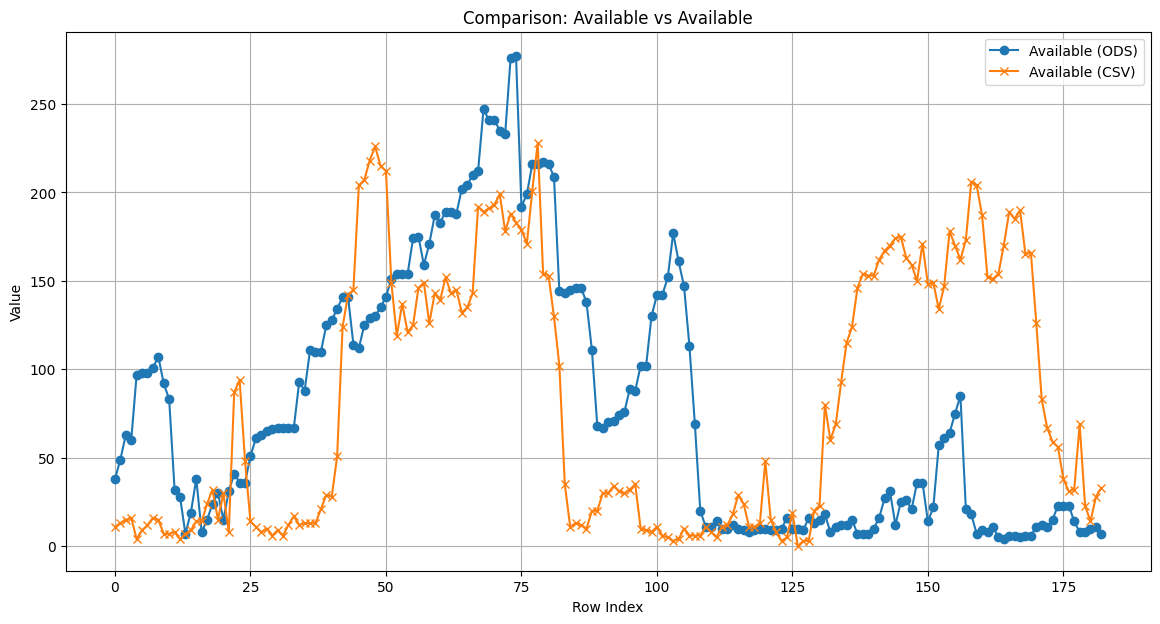

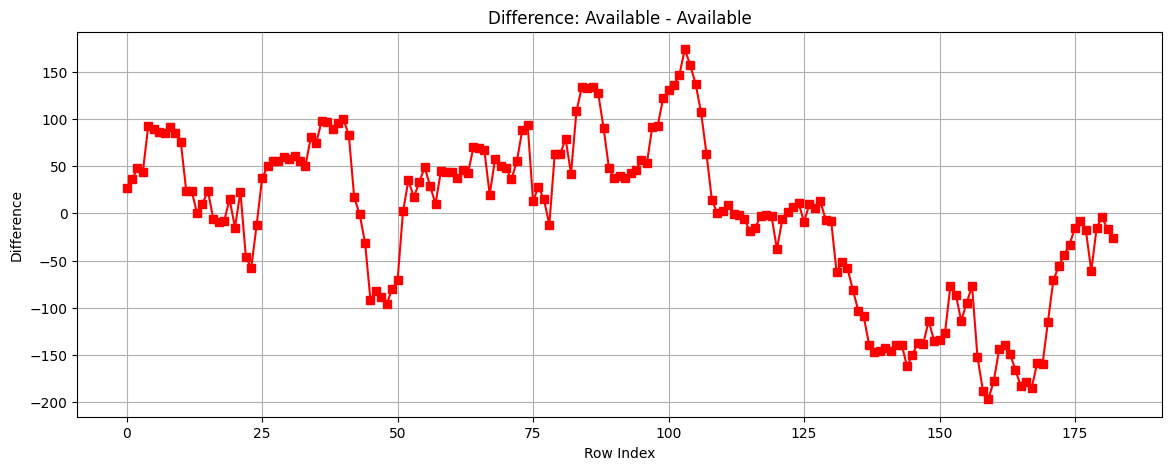


📊 First few differences:
0    27
1    36
2    48
3    44
4    93
Name: Available, dtype: int64

✅ Comparison saved as 'available_comparison_cnn+lstm.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
 # ============================================
# 📊 Compare 'Available' vs 'Hybrid_Available'
# ============================================

# STEP 1: Install required libraries
!pip install pandas odfpy matplotlib --quiet

# STEP 2: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# STEP 3: Upload files
print("📂 Please upload your ODS file (check.ods or cleaned version)...")
uploaded1 = files.upload()

print("\n📂 Please upload your CSV file (cnn_lstm_forecast_183_hours.csv or cleaned version)...")
uploaded2 = files.upload()

# Get uploaded file names
ods_file = list(uploaded1.keys())[0]
csv_file = list(uploaded2.keys())[0]

print(f"\n✅ ODS File: {ods_file}")
print(f"✅ CSV File: {csv_file}")

# STEP 4: Load ODS
ods_df = pd.read_excel(ods_file, engine='odf') if ods_file.endswith('.ods') else pd.read_csv(ods_file)

# STEP 5: Load CSV with fallback
def load_csv(filename):
  for enc in ['utf-8', 'cp1252', 'ISO-8859-1']:
    for delim in [',', ';', '\t']:
      try:
        df = pd.read_csv(filename, encoding=enc, delimiter=delim, on_bad_lines='skip')
        print(f"✅ Loaded CSV with encoding='{enc}' and delimiter='{delim}'")
        return df
      except Exception:
        continue
  raise ValueError(f"❌ Could not load {filename}.")

csv_df = load_csv(csv_file)

# STEP 6: Clean columns
ods_df.columns = ods_df.columns.str.strip()
csv_df.columns = csv_df.columns.str.strip()

print("\n📝 ODS Columns:", list(ods_df.columns))
print("📝 CSV Columns:", list(csv_df.columns))

# STEP 7: Correct columns
ods_column = 'Available'
csv_column = 'Hybrid_Available' if 'Hybrid_Available' in csv_df.columns else 'Available'

# STEP 8: Extract & ensure numeric
available_ods = ods_df[ods_column].apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)
available_csv = csv_df[csv_column].apply(pd.to_numeric, errors='coerce').dropna().reset_index(drop=True)

# STEP 9: Align length
min_len = min(len(available_ods), len(available_csv))
available_ods = available_ods[:min_len]
available_csv = available_csv[:min_len]
difference = available_ods - available_csv

# STEP 10: Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(available_ods, label=f'{ods_column} (ODS)', marker='o')
plt.plot(available_csv, label=f'{csv_column} (CSV)', marker='x')
plt.title(f"Comparison: {ods_column} vs {csv_column}")
plt.xlabel("Row Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot difference
plt.figure(figsize=(14, 5))
plt.plot(difference, color='red', marker='s')
plt.title(f"Difference: {ods_column} - {csv_column}")
plt.xlabel("Row Index")
plt.ylabel("Difference")
plt.grid(True)
plt.show()

print("\n📊 First few differences:")
print(difference.head())

# STEP 11: Save results
comparison_df = pd.DataFrame({
    'ODS_Available': available_ods,
    'CSV_Hybrid_Available': available_csv,
    'Difference': difference
})
comparison_df.to_csv('available_comparison_cnn+lstm.csv', index=False)
print("\n✅ Comparison saved as 'available_comparison_cnn+lstm.csv'.")

# Optional: Download result
files.download('available_comparison_cnn+lstm.csv')
